<a href="https://colab.research.google.com/github/1900690/pest-object-detection/blob/main/%E2%91%A2%E5%AE%B3%E8%99%AB%E6%A4%9C%E7%9F%A5%E3%82%A2%E3%83%97%E3%83%AA%E3%82%B1%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E6%9C%AC%E4%BD%93_0.0.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**画像から検出を行う**

##事前準備

In [1]:
#@title 1.学習済みAIをアップロード
#ライブラリをインポート
import shutil
import os
from google.colab import files

#スイッチ
ファイルをグーグルドライブからアップロード=True#@param {type:"boolean"}
drive=ファイルをグーグルドライブからアップロード
ローカルからアップロード=False#@param {type:"boolean"}
direct=ローカルからアップロード

#すでにある場合は消去する
if os.path.exists('/content/best.pt'):
  shutil.rmtree('/content/best.pt')

if drive==True:
  #グーグルドライブに接続
  from google.colab import drive
  drive.mount('/content/drive')
  
  #最終学習結果が格納されているパスを取得
  result_folda_pass="/content/drive/MyDrive/pest-object-detection/runs/detect/"
  read_files_annotations = os.listdir(result_folda_pass)
  read_files_annotations.sort(reverse=True)
  result_pass=result_folda_pass+read_files_annotations[0]+"/weights/best.pt"
  #グーグルドライブからcontentにコピー
  shutil.copyfile(result_pass,"/content/best.pt")
  
if direct==True:
  #データをアップロード
  uploaded = files.upload()


Mounted at /content/drive


In [1]:
#@title 2.ultralytics(AIライブラリ)をインストール
%pip -q install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [4]:
#@title 3.rembg(背景消去ライブラリ)をインストール
#rembgをインストール
!pip -q install rembg
#新しくインストールしたライブラリを働かせるためにランタイムを一度リセット
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##検出

In [1]:
#@title 1.画像のアップロード
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os

#データを入れるためのフォルダを作成（すでにフォルダがある場合は消去する）
if os.path.exists('/content/original'):
  shutil.rmtree('/content/original')
if not os.path.exists('/content/original'):
    os.makedirs('/content/original')

#カレントディレクトリを移動
%cd -q '/content/original/'

#データをアップロード
from google.colab import files
uploaded = files.upload()

#元のディレクトリに戻る
%cd -q '/content/'

Saving demo_img.jpg to demo_img.jpg


In [2]:
#@title 2.背景処理
#ライブラリをインポート
import cv2
import shutil
import os
from rembg import remove

#背景処理後の画像を入れるフォルダを作る
if not os.path.exists('/content/erase_background/'):
  os.mkdir('/content/erase_background/')

#元画像のリストを作成
read_folda_name='/content/original/'
read_folda = sorted(os.listdir(read_folda_name))

#背景処理を行う
for imgname in read_folda:
  input = cv2.imread('/content/original/'+imgname)
  output = remove(input)
  cv2.imwrite('/content/erase_background/'+imgname, output)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 46.2GB/s]


In [3]:
#@title 3.画像を分割
#@markdown ※学習に使用した画像の大きさが分割後のピクセル範囲内にあるようにする
#ライブラリをインポート
import cv2
import numpy as np
import os
import shutil

#入力部分
横の分割数=20 #@param {type:"integer"}
split_x=横の分割数
縦の分割数=20 #@param {type:"integer"}
split_y=縦の分割数

#グリット分割画像の保存先を作成
if os.path.exists('/content/originals_grid/'):
  shutil.rmtree('/content/originals_grid/')
if not os.path.exists('/content/originals_grid/'):
    os.makedirs('/content/originals_grid/')

#画像分割先のフォルダを作成
if os.path.exists('/content/split_image/'):
  shutil.rmtree('/content/split_image/')
if not os.path.exists('/content/split_image/'):
  os.makedirs('/content/split_image/')

#画像の読み込み(背景処理済み)
read_files_name='/content/erase_background/'
read_files = sorted(os.listdir(read_files_name))
#画像の読み込み(背景処理前)
read_files_name_original='/content/original/'

#縦と横のピクセル数を保存する
list_x = list(range(len(read_files)))
list_y = list(range(len(read_files)))
count=0

for file_name in read_files:
  fname = read_files_name+file_name
  foldaname=fname[9:]
  img=cv2.imread(fname,cv2.IMREAD_COLOR)
  fname_original = read_files_name_original+file_name
  original_img=cv2.imread(fname_original,cv2.IMREAD_COLOR)
  #画像の縦横の大きさを抽出
  h,w=img.shape[:2]

  #縦横のピクセル数を保存
  list_x[count]=int(w/split_x)
  list_y[count]=int(h/split_y)
  count=count+1


  #画像の分割処理
  cx=0
  cy=0
  for j in range(split_x):
      for i in range(split_y):
          split_pic=img[cy:cy+int(h/split_y),cx:cx+int(w/split_x),:]
          #背景の黒を除外
          b = split_pic.T[0].flatten().mean()
          g = split_pic.T[1].flatten().mean()
          r = split_pic.T[2].flatten().mean()
          average=b+r+g
          if average>0:
            cv2.imwrite("/content/split_image/"+file_name[:-4]+'_y'+str('{0:02d}'.format(int(i)))+'_x'+str('{0:02d}'.format(int(j)))+foldaname[-4:],split_pic)
          cy=cy+int(h/split_y)
      cy=0
      cx=cx+int(w/split_x)

  #分割する線を描いた画像を出力
  y_step=int(h/split_y) #縦の分割間隔
  x_step=int(w/split_x) #横の分割間隔

  #オブジェクトimgのshapeメソッドの1つ目の戻り値(画像の高さ)をimg_yに、2つ目の戻り値(画像の幅)をimg_xに
  img_y,img_x=original_img.shape[:2]  

  #横線を引く：y_stepからimg_yの手前までy_stepおきに白い(BGRすべて255)横線を引く
  original_img[y_step:img_y:y_step, :, :] = 0
  #縦線を引く：x_stepからimg_xの手前までx_stepおきに白い(BGRすべて255)縦線を引く
  original_img[:, x_step:img_x:x_step, :] = 0
  #grid画像を保存
  cv2.imwrite("/content/originals_grid/"+file_name[:-4]+"grid"+foldaname[-4:],original_img) #ファイル名'grid.png'でimgを保存
print("分割後の横のピクセルの範囲は",min(list_x),"～",max(list_x),"、縦のピクセルの範囲は",min(list_y),"～",max(list_y))

分割後の横のピクセルの範囲は 156 ～ 156 、縦のピクセルの範囲は 208 ～ 208


In [4]:
#@title 4.一回目の検出
#ライブラリをインポート
import ultralytics
import os
import shutil

#検出後の画像を入れるフォルダを作成
if os.path.exists('/content/runs/detect/predict'):
  shutil.rmtree('/content/runs/detect/predict')

#検出(conf=0.01とすることで害虫の候補の位置を検出)
!yolo task=detect mode=predict model="/content/best.pt" conf=0.01 source='/content/split_image/' save_txt=True save_conf=True save=True

WARNING ⚠️ /content/best.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: YOLOv8 requirement "omegaconf" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=3245be2b0aae7a1f358b14da280a874706975fbc1914ec1b0d357499eb9c7693
  Stored in di

In [5]:
#@title 5.検出結果を元に画像を切り取りして保存

#ライブラリをインポート
import pandas as pd
import os
import shutil
import glob
from PIL import Image, ImageDraw
import numpy as np
import cv2

#切り出し関数を定義
def rot_cut(src_img, deg, center, size):
    rot_mat = cv2.getRotationMatrix2D(center, deg, 1.0)
    rot_mat[0][2] += -center[0]+size[0]/2 # -(元画像内での中心位置)+(切り抜きたいサイズの中心)
    rot_mat[1][2] += -center[1]+size[1]/2 # 同上
    return cv2.warpAffine(src_img, rot_mat, size)

#切り取った画像の入れ場所を作る
if os.path.exists("/content/second_cut"):
  shutil.rmtree("/content/second_cut")
if not os.path.exists("/content/second_cut"):
  os.mkdir("/content/second_cut")

#txtを読み込み
read_files_name_bbox='/content/runs/detect/predict/labels/*'
read_files_bbox = sorted(glob.glob(read_files_name_bbox))

for txt_name in read_files_bbox:
  #txtの中身を読み込み
  txt_file = pd.read_csv(txt_name,header=None, sep=" ")
  for i in range(len(txt_file[0])):
    im = Image.open('/content/runs/detect/predict/'+txt_name[36:-4]+".jpg")
    im_original = Image.open('/content/erase_background/'+txt_name[36:-12]+".jpg")
    image_height,image_width=np.array(im).shape[:2]
    image_height_original,image_width_original=np.array(im_original).shape[:2]
    name=txt_name[30:]
    y_number=int(txt_name[-10:-8])
    x_number=int(txt_name[-6:-4])

    x_center=float(txt_file[1][i])*image_width
    y_center=float(txt_file[2][i])*image_height
    width=float(txt_file[3][i])*image_width
    height=float(txt_file[4][i])*image_height

    x1=(x_center-width/2)
    y1=(y_center-height/2)
    x2=(x_center+width/2)
    y2=(y_center+height/2)

    x_min_original=x1+image_width*x_number
    y_min_original=y1+image_height*y_number
    x_max_original=x2+image_width*x_number
    y_max_original=y2+image_height*y_number

    absolute_x_original=x_min_original+(x_max_original-x_min_original)/2
    absolute_y_original=y_min_original+(y_max_original-y_min_original)/2
    absolute_width_original=x_max_original-x_min_original
    absolute_height_original=y_max_original-y_min_original

    #中心で切り取って保存
    test_img=rot_cut(np.array(im_original), 0,(int(absolute_x_original),int(absolute_y_original)),(int(image_width),int(image_height)))
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite('/content/second_cut/'+txt_name[36:-4]+"_"+str('{0:04d}'.format(int(absolute_x_original)))+"_"+str('{0:04d}'.format(int(absolute_y_original)))+'.jpg',test_img)

In [7]:
#@title 6.二回目の検出

#検出後の画像を入れる場所を作る
if os.path.exists('/content/runs/detect/predict2'):
  shutil.rmtree('/content/runs/detect/predict2')

%cd '/content/'
#検出(conf=0.4とすることで害虫の位置を検出)
!yolo task=detect mode=predict model="/content/best.pt" conf=0.4 source='/content/second_cut/' save_txt=True save_conf=True

/content
Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/51 /content/second_cut/demo_img_y00_x09_1421_0199.jpg: 640x480 (no detections), 77.0ms
image 2/51 /content/second_cut/demo_img_y00_x09_1423_0203.jpg: 640x480 (no detections), 71.3ms
image 3/51 /content/second_cut/demo_img_y00_x09_1426_0197.jpg: 640x480 (no detections), 41.1ms
image 4/51 /content/second_cut/demo_img_y01_x07_1105_0222.jpg: 640x480 (no detections), 43.8ms
image 5/51 /content/second_cut/demo_img_y02_x11_1852_0590.jpg: 640x480 (no detections), 42.0ms
image 6/51 /content/second_cut/demo_img_y02_x11_1852_0596.jpg: 640x480 1 mite, 41.0ms
image 7/51 /content/second_cut/demo_img_y02_x12_1881_0598.jpg: 640x480 (no detections), 42.5ms
image 8/51 /content/second_cut/demo_img_y02_x12_1882_0592.jpg: 640x480 (no detections), 41.9ms
image 9/51 /content/second_cut/demo_img_y02_x12_1882_0602.jpg: 640x480

In [8]:
#@title 7.検出位置の整理を行い白黒画像を作成

#白黒画像の保存場所
if os.path.exists("/content/test_brack/"):
  shutil.rmtree("/content/test_brack/")
if not os.path.exists("/content/test_brack/"):
    os.mkdir("/content/test_brack/")

#元の画像を読み込み
read_files_name_bbox_brack='/content/erase_background/*'
read_files_bbox_brack = sorted(glob.glob(read_files_name_bbox_brack))

#白黒画像作成のもとになる0のみの画像を作成
for txt_name_brack in read_files_bbox_brack:
  image_width_original,image_height_original=np.array(Image.open(txt_name_brack)).shape[:2]
  #8bit(0～255)で黒い画像を作成
  img_brack = Image.new("L", (image_height_original,image_width_original),0)
  img_brack.save('/content/test_brack/'+txt_name_brack[26:-4]+'.png')

#検出結果のtxtファイルのリストを読み込み
read_files_name_bbox='/content/runs/detect/predict2/labels/*'
read_files_bbox = sorted(glob.glob(read_files_name_bbox))

for txt_name in read_files_bbox:
  #検出結果のtxtファイルを読み込み
  txt_file = pd.read_csv(txt_name,header=None, sep=" ")
  for i in range(len(txt_file[0])):
    
    #画像を読み込み
    im = Image.open('/content/runs/detect/predict2/'+txt_name[36:-4]+".jpg")
    im_original = Image.open('/content/original/'+txt_name[36:-22]+".jpg")

    #座標を計算して求める
    image_height,image_width=np.array(im).shape[:2]
    image_height_original,image_width_original=np.array(im_original).shape[:2]
    name=txt_name[37:]
    y_centerpoint=int(txt_name[-8:-4])
    x_centerpoint=int(txt_name[-13:-9])

    x_center=float(txt_file[1][i])*image_width
    y_center=float(txt_file[2][i])*image_height
    width=float(txt_file[3][i])*image_width
    height=float(txt_file[4][i])*image_height

    x_min_edge=x_center-width/2
    y_min_edge=y_center-height/2
    x_max_edge=x_center+width/2
    y_max_edge=y_center+height/2

    #画像の端にある座標を検出
    end_detect_x = [int(x_min_edge),int(x_max_edge)]
    end_detect_y = [int(y_min_edge),int(y_max_edge)]
    n = sum(1 for x in end_detect_x if x<=0 or x>=image_width)
    m = sum(1 for x in end_detect_y if x<=0 or x>=image_height)
    
    #座標が端にない場合に続きの処理を行う
    if n+m==0:

       x0point=x_centerpoint-image_width/2
       y0point=y_centerpoint-image_height/2

       x_min_original=x0point+x_center-width/2
       y_min_original=y0point+y_center-height/2
       x_max_original=x0point+x_center+width/2
       y_max_original=y0point+y_center+height/2

       absolute_x_original=x_min_original+(x_max_original-x_min_original)/2
       absolute_y_original=y_min_original+(y_max_original-y_min_original)/2
       absolute_width_original=x_max_original-x_min_original
       absolute_height_original=y_max_original-y_min_original

       #複数検出を分けるために害虫の検出位置を白黒画像に足し合わせる
       img_brack=np.array(Image.open('/content/test_brack/'+txt_name[36:-22]+'.png'))
       brack_height,brack_width=img_brack.shape[:2]
       img_brack_temp=np.zeros((brack_height,brack_width), dtype=np.int8)
       img_brack_temp[int(y_min_original):int(y_max_original), int(x_min_original):int(x_max_original)] = 1
       img_brack_test=img_brack_temp+img_brack

       #極端に細い(一辺が10ピクセル以下)場合には座標を追加しない
       if absolute_width_original>10 and absolute_height_original>10:
          Image.fromarray(img_brack_test).save('/content/test_brack/'+txt_name[36:-22]+'.png')

In [9]:
#@title 8.白黒画像から座標データを作成

#ライブラリをインポート
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2
import numpy as np

#PIL型 -> OpenCV型に変換する関数を定義
def pil2cv(image):
    ''' PIL型 -> OpenCV型 '''
    new_image = np.array(image, dtype=np.uint8)
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = new_image[:, :, ::-1]
    elif new_image.shape[2] == 4:  # 透過
        new_image = new_image[:, :, [2, 1, 0, 3]]
    return new_image

#今後の計算用のアノテーションファイルの出力場所
yolo_pass="/content/originals_test_annotations/"
if os.path.exists('/content/originals_test_annotations/'):
  shutil.rmtree('/content/originals_test_annotations/')
if not os.path.exists(yolo_pass):
    os.mkdir(yolo_pass)

#出力用のYOLOアノテーションファイルの出力場所
yolo_pass_yolotype="/content/originals_test_annotations_yolotype/"
if os.path.exists('/content/originals_test_annotations_yolotype/'):
  shutil.rmtree('/content/originals_test_annotations_yolotype/')
if not os.path.exists(yolo_pass_yolotype):
    os.mkdir(yolo_pass_yolotype)

#白黒画像のリストを取得
LOAD_FOLDA = '/content/test_brack/'
LOAD_NAME = sorted(os.listdir(LOAD_FOLDA))

#白黒画像から座標を作成
for file_name in LOAD_NAME:

  im = np.array(Image.open(LOAD_FOLDA+file_name))
  img = np.where(im > 0, 1, 0)
  image_height,image_width=im.shape[:2]
  
  #輪郭を抽出
  contours, hierarchy = cv2.findContours(pil2cv(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE ) 

  #輪郭から座標を作成
  for i in range(len(contours)):
    y_min = np.amin(contours[i], axis=0)[0][1]
    y_max = np.amax(contours[i], axis=0)[0][1]
    x_min = np.amin(contours[i], axis=0)[0][0]
    x_max = np.amax(contours[i], axis=0)[0][0]

    absolute_x=x_min+(x_max-x_min)/2
    absolute_y=y_min+(y_max-y_min)/2
    absolute_height=x_max-x_min
    absolute_width=y_max-y_min

    col1="0"
    col2=str(absolute_x / (image_width))
    col3=str(absolute_y / (image_height))
    col4=str(absolute_height / (image_width))
    col5=str(absolute_width / (image_height))
    
    #座標をテキストファイルに記載
    with open(yolo_pass+file_name[:-4]+'.txt', 'a') as f:
      rote=col1+' '+col2+' '+col3+' '+col4+' '+col5+'\n'
      f.write(rote)
    with open(yolo_pass_yolotype+file_name[:-4]+'.txt', 'a') as f:
      rote=col1+' '+col2+' '+col3+' '+col4+' '+col5+'\n'
      f.write(rote)

In [10]:
#@title 9.座標データから画像に印を記入する

#ライブラリをインポート
from PIL import Image, ImageDraw

#印を記載した画像を保存する場所を作成
folda_pass="/content/originals_test_annotations_drawing"
if os.path.exists(folda_pass):
  shutil.rmtree(folda_pass)
if not os.path.exists(folda_pass):
    os.mkdir(folda_pass)

#座標データのリストを読み込み
read_files_name_bbox='/content/originals_test_annotations/*'
read_files_bbox = sorted(glob.glob(read_files_name_bbox))


for txt_name in read_files_bbox:

  #書き込む画像を読み込み
  im_original = Image.open('/content/original/'+txt_name[36:-4]+".jpg")
  image_height,image_width=np.array(im_original).shape[:2]
  
  #書き込む座標データを読み込み
  txt_file = pd.read_csv('/content/originals_test_annotations/'+txt_name[36:-4]+".txt",header=None, sep=" ")
  for annotation in range(len(txt_file)):

    x_center=float(txt_file[1][annotation])*image_width
    y_center=float(txt_file[2][annotation])*image_height
    width=float(txt_file[3][annotation])*image_width
    height=float(txt_file[4][annotation])*image_height

    x1=int(x_center-width/2)
    y1=int(y_center-height/2)
    x2=int(x_center+width/2)
    y2=int(y_center+height/2)
    
    #座標データに沿って四角を書き込み
    draw = ImageDraw.Draw(im_original)
    draw.rectangle((x1, y1, x2, y2), outline=(255, 0, 0), width=5)
    im_original.save('/content/originals_test_annotations_drawing/'+txt_name[36:-4]+'.jpg')

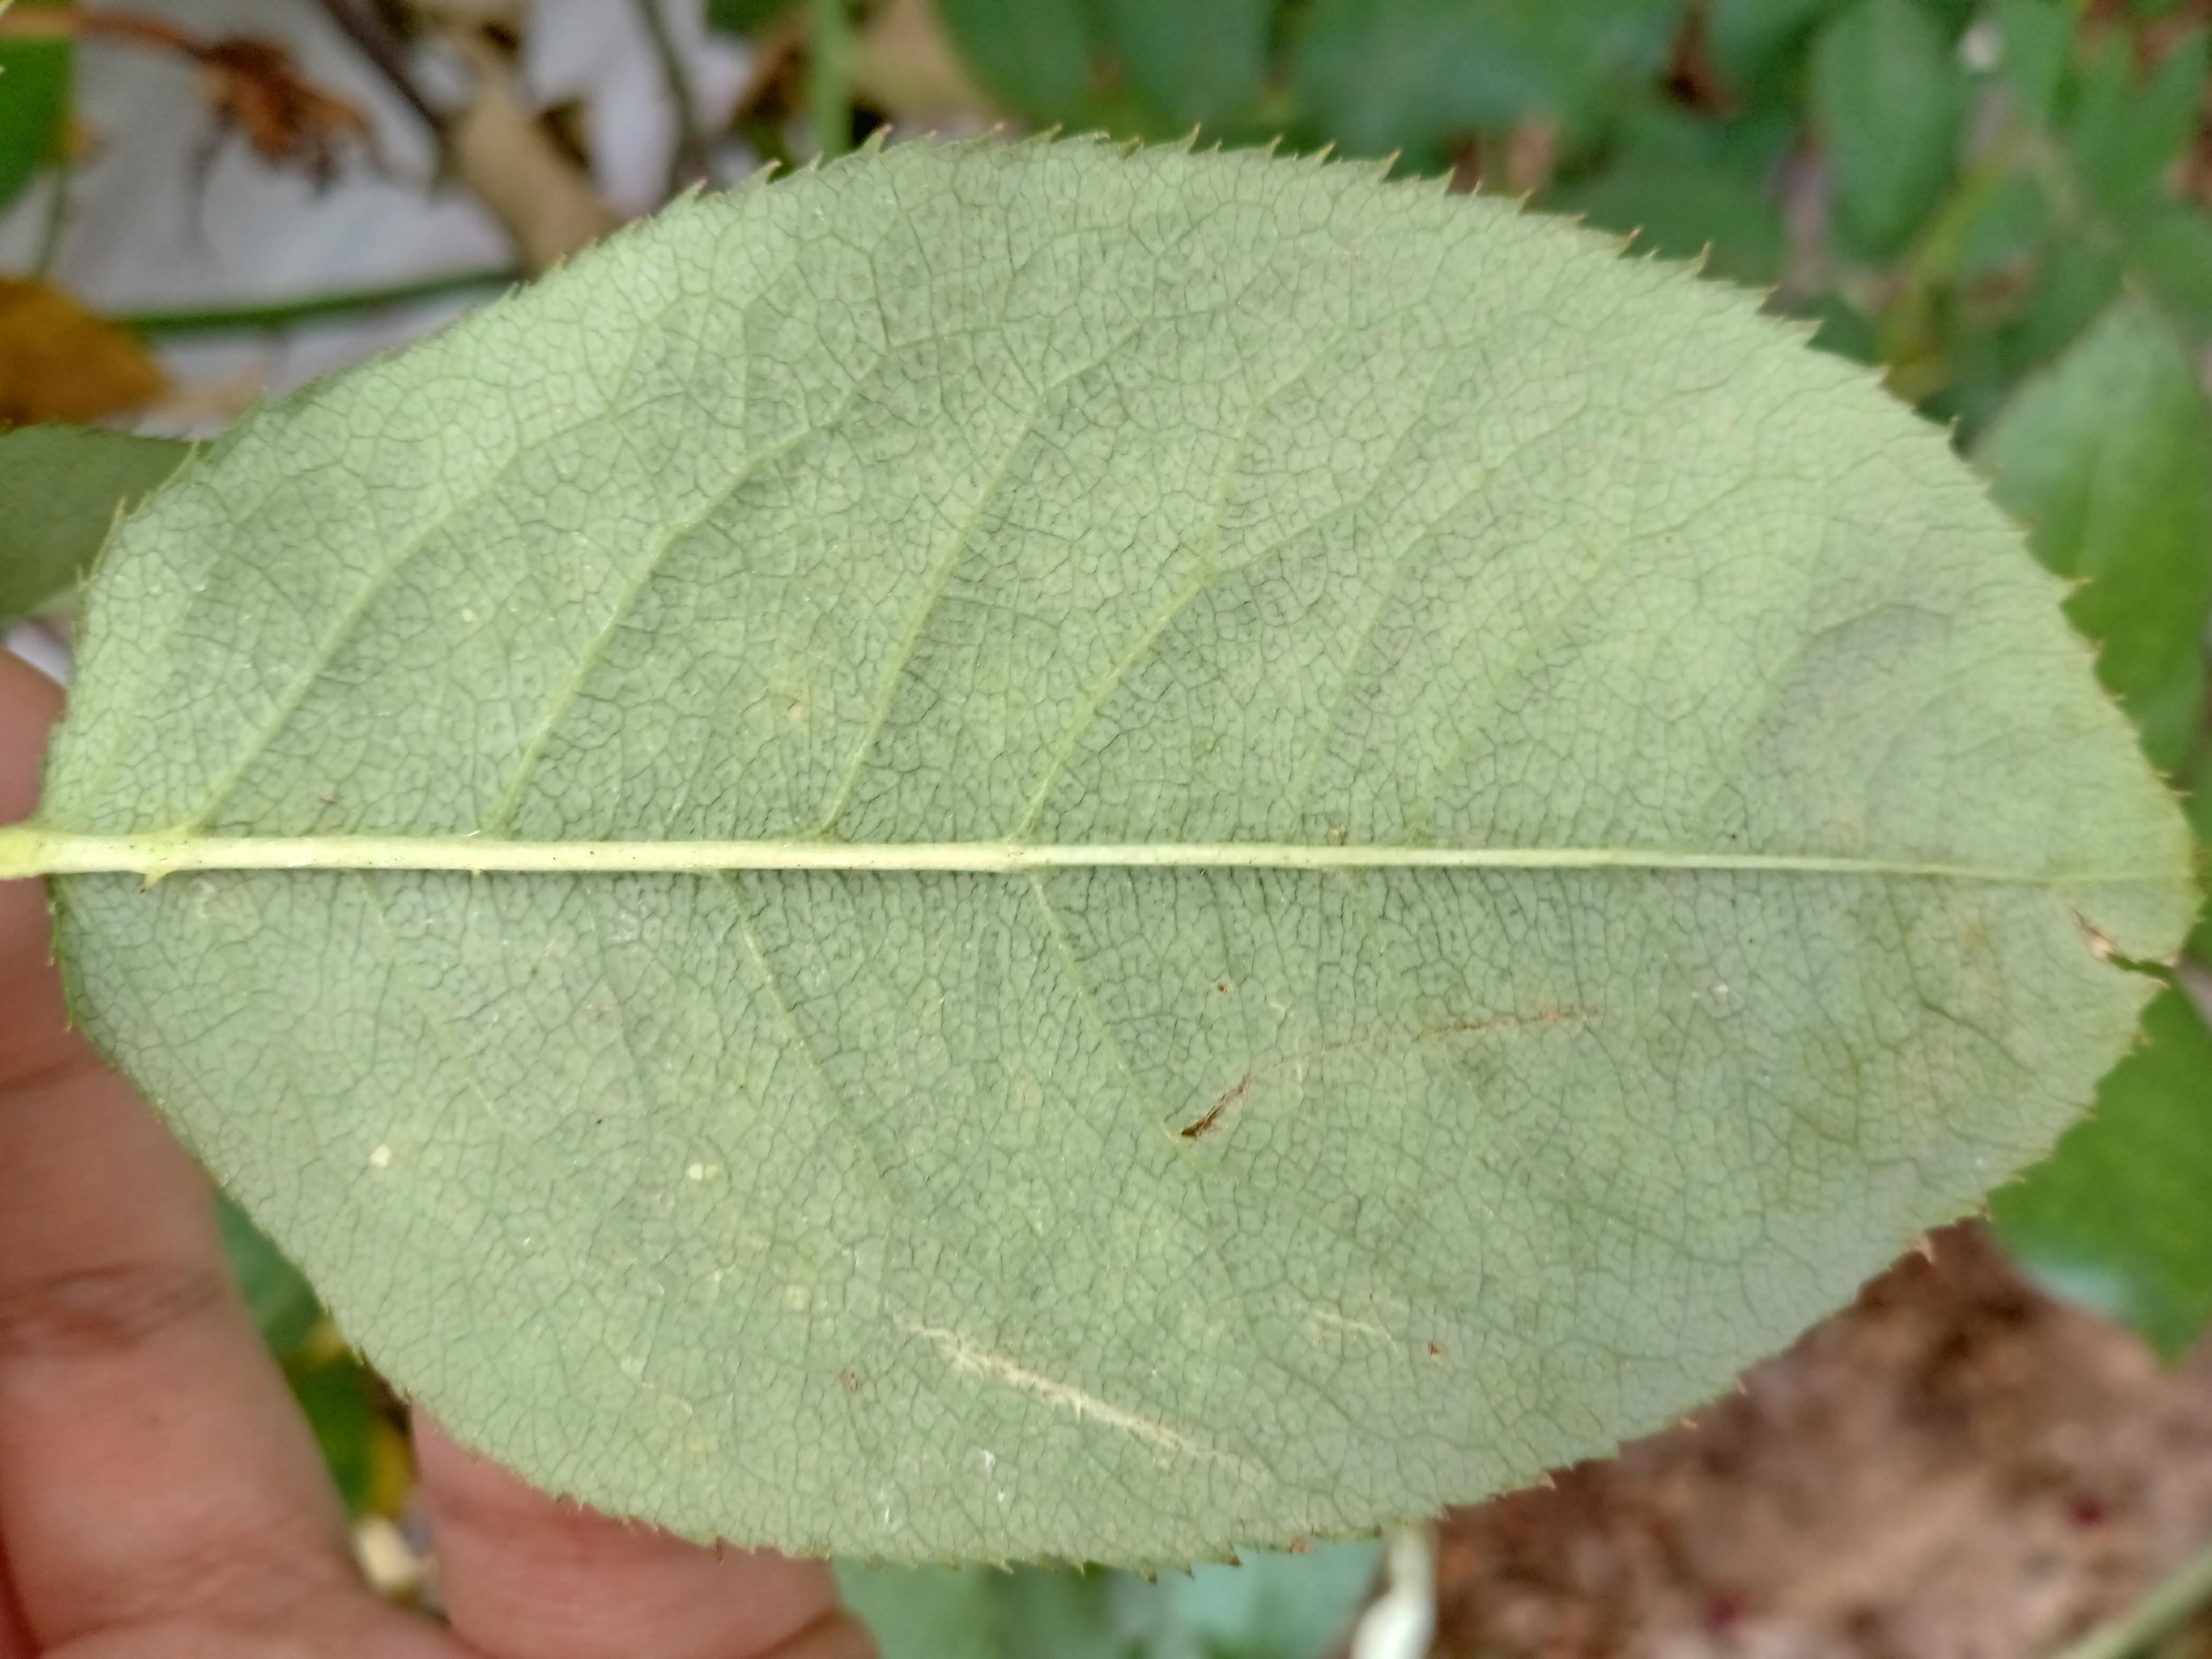

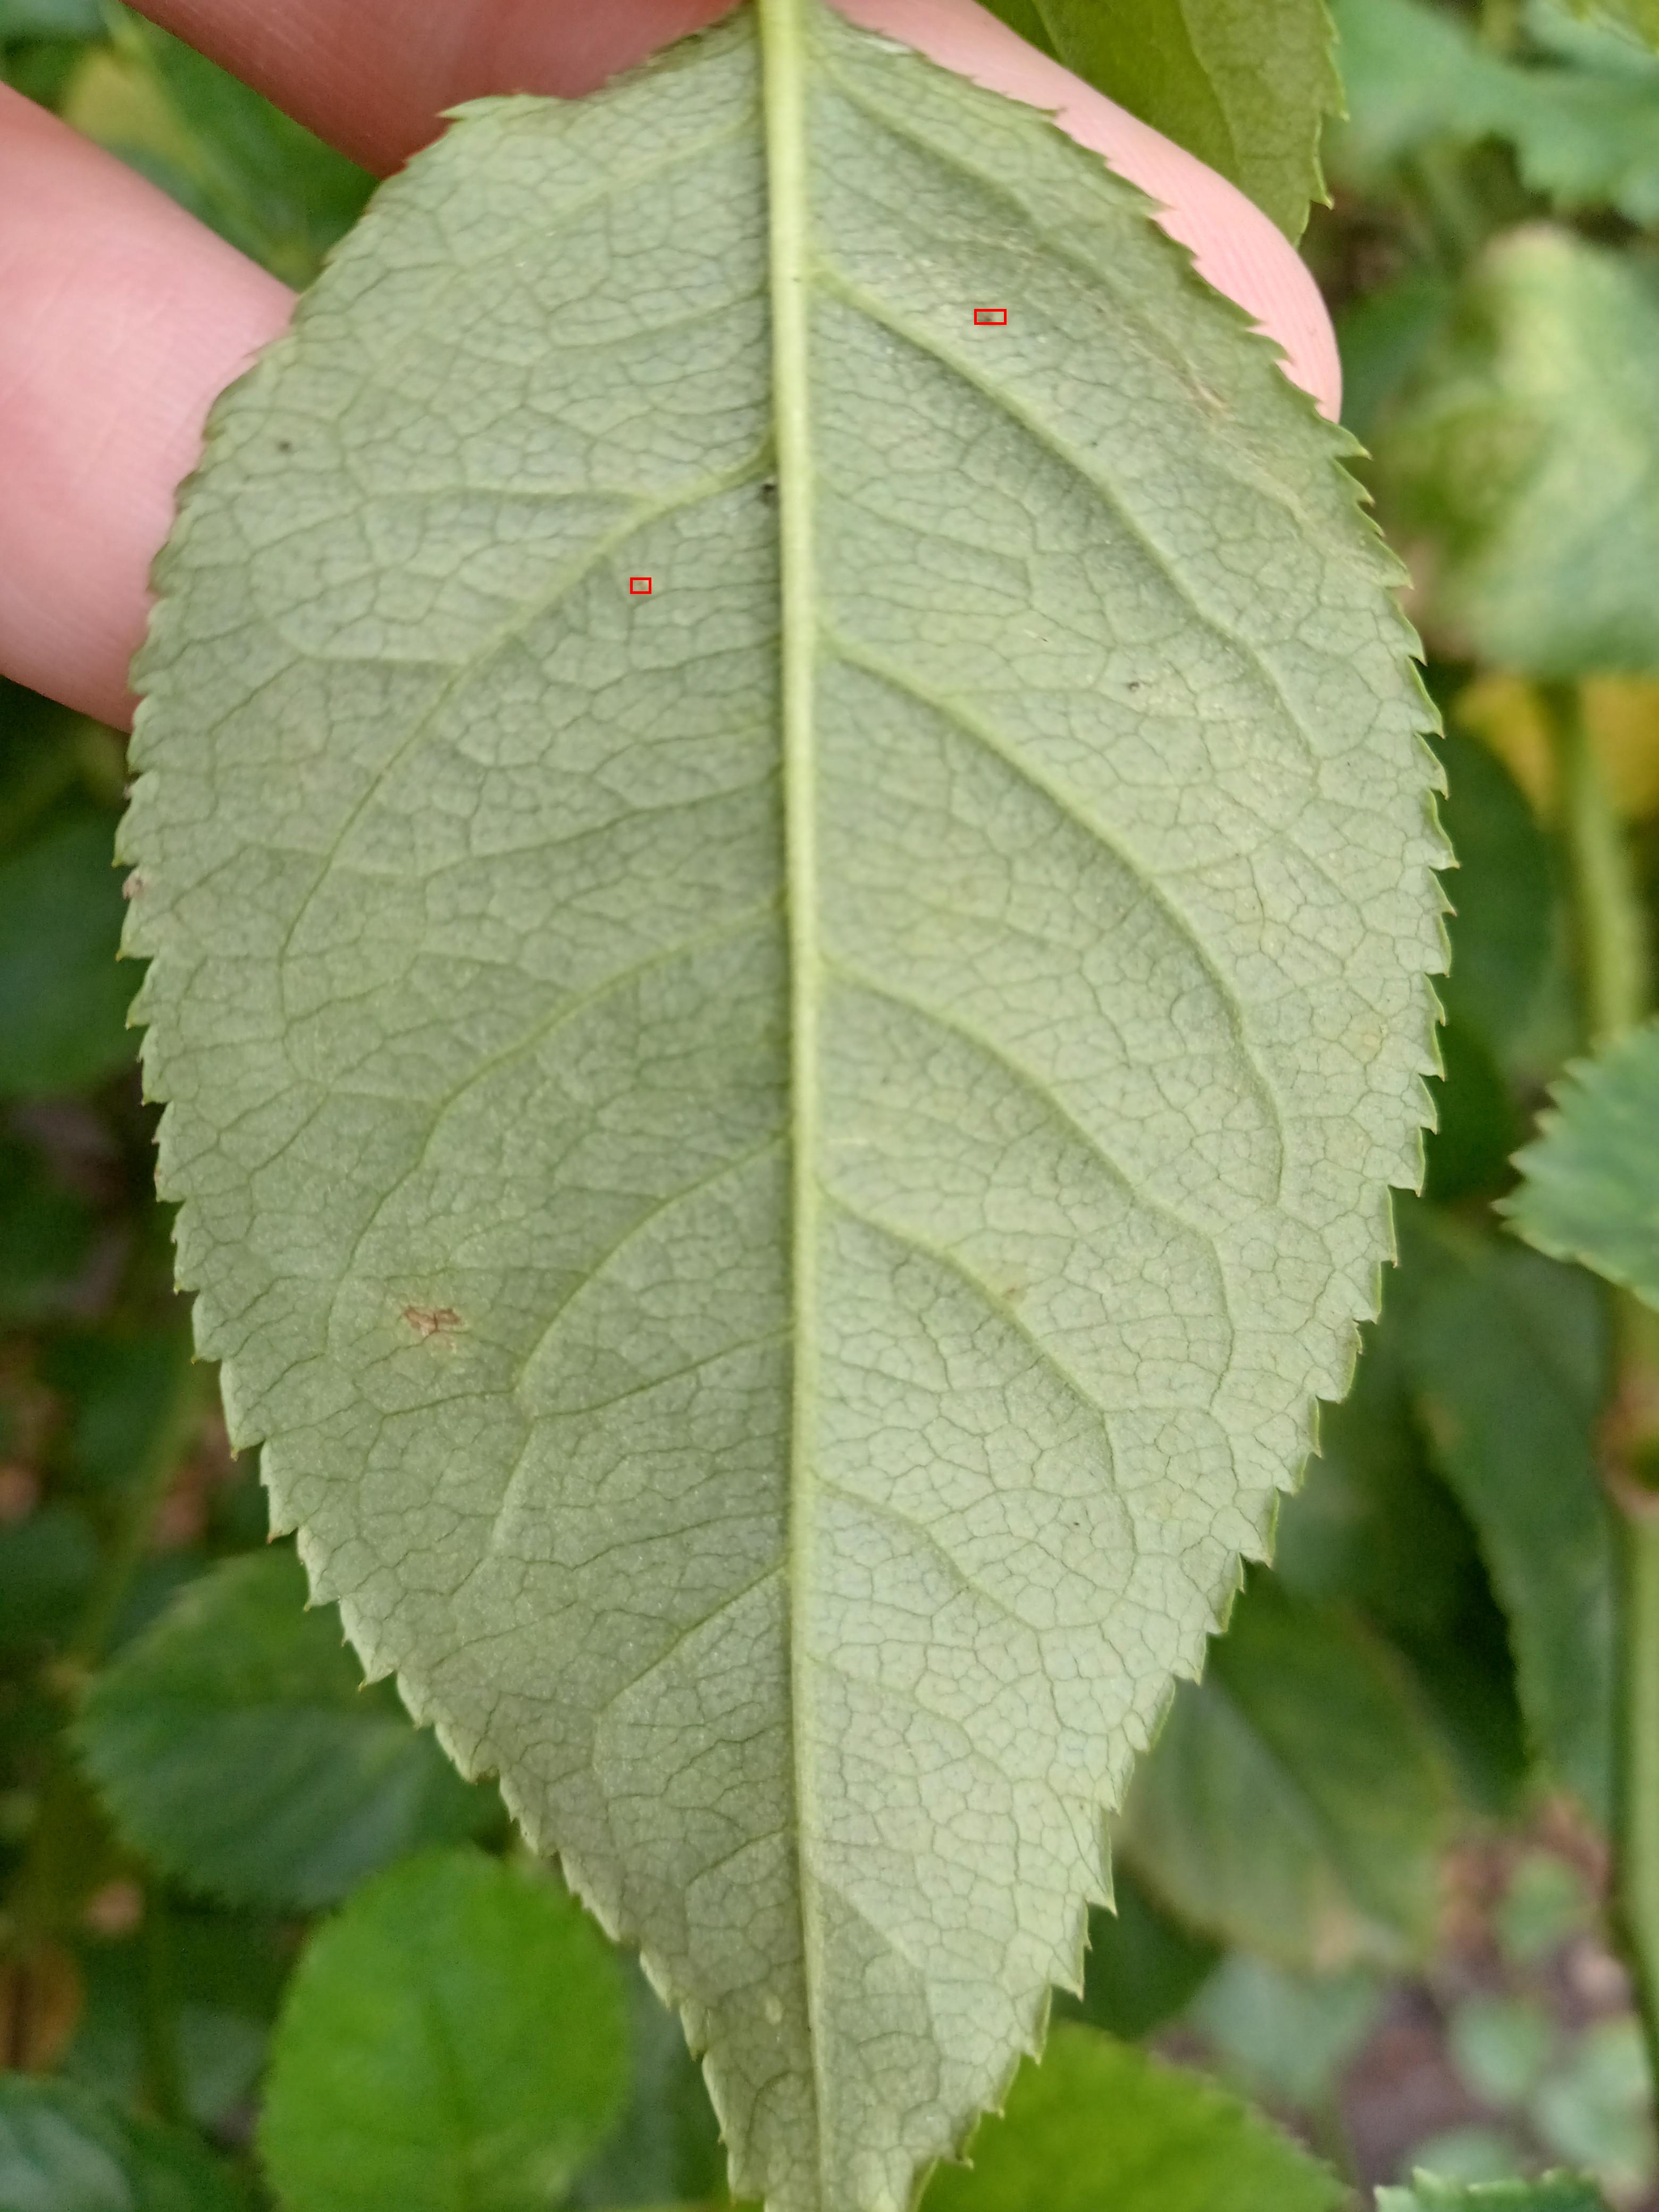

In [21]:
#@title 10.画像を表示
from IPython.display import Image,display_jpeg

read_files_name_bbox='/content/originals_test_annotations_drawing/*'
read_files_bbox = sorted(glob.glob(read_files_name_bbox))

for file_pass in read_files_bbox:
  display_jpeg(Image(file_pass))

In [ ]:
#@title 11.画像をダウンロード

#ライブラリをインポート
import shutil
import os
from google.colab import files

#スイッチ
ファイルをグーグルドライブに保存=False#@param {type:"boolean"}
drive=ファイルをグーグルドライブに保存
ファイルをダウンロードする=True#@param {type:"boolean"}
direct=ファイルをダウンロードする

#圧縮
shutil.make_archive('/content/result_image', format='zip', root_dir='/content/originals_test_annotations_drawing')

if drive==True:
  #グーグルドライブに接続
  from google.colab import drive
  drive.mount('/content/drive')
  #グーグルドライブにコピー
  shutil.copyfile("/content/result_image.zip","/content/drive/MyDrive/result_image.zip")
  
if direct==True:
  files.download("/content/result_image.zip")
